In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
list_min_lambda = [0,0.1,1,10]
list_n_genes = [0,1,5,10,25,50,75,100]
list_ch = ['4']
#from supplementary table 1, removed EPGN because not in gene expression
set_target_genes = {'FAM13A','HHIP','BTC','NPNT','PPA2','PPM1K','TET2','NAP1L5'}
dir_pcorr_output = "/proj/regeps/regep00/studies/LTRC/analyses/remge/PartialCorrelation/Pcorr_output_same_cont_genes/"


In [27]:
dict_name = {'with_CellComp':'with Cell Composition','with_pheno':' with Phenotype variables','with_pheno_fev1':' with Phenotype variables','rnd_Prior':'random Prior','rnd_PPI':'random PPI'}

def compare_base_review(name_exp, hue_boxplot = None,y_lim=None):
    new_folder_name = 'Pcorr_output_review_'+name_exp
    path_file = "/proj/regeps/regep00/studies/LTRC/analyses/remge/PartialCorrelation/%s/LTRC/nreg_10_minL_1_ch_4/obs_case.csv"%new_folder_name
    df_pcorr_new = pd.read_csv(path_file,index_col=0)
    df_pcorr_old = pd.read_csv(path_file.replace(new_folder_name,'Pcorr_output_same_cont_genes'),index_col=0)
    df_pcorr_new = df_pcorr_new.loc[df_pcorr_old.index,df_pcorr_old.index]

    
    x = df_pcorr_new.values[np.triu_indices_from(df_pcorr_new,1)]
    y = df_pcorr_old.values[np.triu_indices_from(df_pcorr_new,1)]
    diff = np.abs(x-y)
    diff_index = np.where(diff>0.001)
    print('Max distance:',(diff[diff_index]).max().max(),np.abs(diff[diff_index]/x[diff_index]).max())
    plt.xlabel('Pcorr')
    plt.ylabel('Pcorr '+dict_name[name_exp])
    plt.title('Pcorr comparison\nCOPD, n_genes: %i,min_lambda: %i'%(10,1))
    plt.scatter(x,y)
    plt.plot([-1,1],[-1,1],c='r',linestyle='--',label='x=y')
    plt.axvline(0,c='black',alpha=.5,linewidth=.5)
    plt.axhline(0,c='black',alpha=.5,linewidth=.5)
    plt.legend()
    plt.show()
    #Boxplot distance PartialCorrelation between base vs edit. 
    df_l2 = []
    for pop in ['case','control']:
        for ml in list_min_lambda:
            for ng in list_n_genes:
                if ml!=0 and ng==0:
                    continue
                path_file = "/proj/regeps/regep00/studies/LTRC/analyses/remge/PartialCorrelation/%s/LTRC/nreg_%i_minL_%i_ch_4/obs_%s.csv"%(new_folder_name,ng,ml,pop)
                df_pcorr_new = pd.read_csv(path_file,index_col=0)
                df_pcorr_old = pd.read_csv(path_file.replace(new_folder_name,'Pcorr_output_same_cont_genes'),index_col=0)
                df_pcorr_new = df_pcorr_new.loc[df_pcorr_old.index,df_pcorr_old.index]
                x = df_pcorr_new.values[np.triu_indices_from(df_pcorr_new,1)]
                y = df_pcorr_old.values[np.triu_indices_from(df_pcorr_new,1)]
                diff = np.mean(np.abs(x-y))
                df_l2.append([pop,ng,ml,diff])

    df_l2=pd.DataFrame(df_l2,columns=['pop','n_genes','min_lambda','Mean Abs Dist'])
    #df_l2['logl2'] = np.log10(df_l2.l2+1)

    sns.boxplot(data=df_l2,x='n_genes',y='Mean Abs Dist',hue=hue_boxplot)
    if y_lim is not None:
        plt.ylim(y_lim)
    plt.title('Difference in Partial Correlations \n Base vs %s'%dict_name[name_exp])
    return df_l2

Max distance: 0.0653206550177641 7827.441308676377


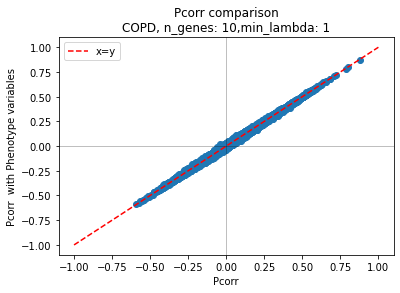

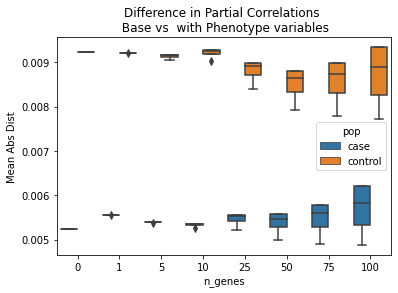

In [224]:
compare_base_review(name_exp='with_pheno',hue_boxplot='pop')

Max distance: 0.0702315780706502 1321.3224395349296


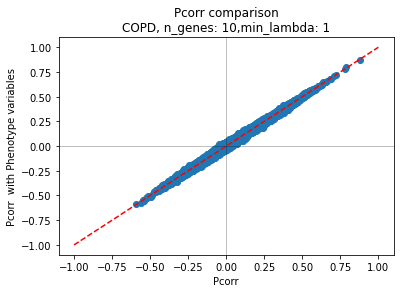

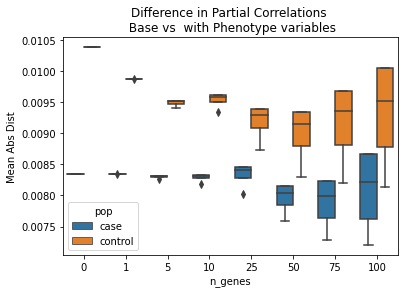

In [219]:
compare_base_review(name_exp='with_pheno_fev1',hue_boxplot='pop')

Max distance: 0.4056606125208747 9756.445687393063


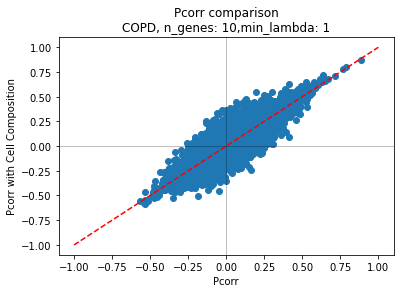

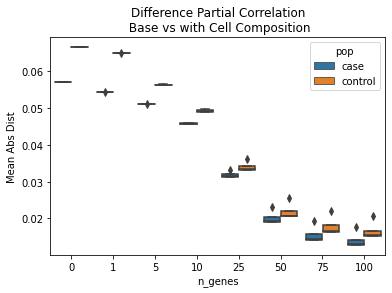

In [215]:
compare_base_review('with_CellComp',hue_boxplot='pop')

Max distance: 0.9629776036666023 7489.192672141987


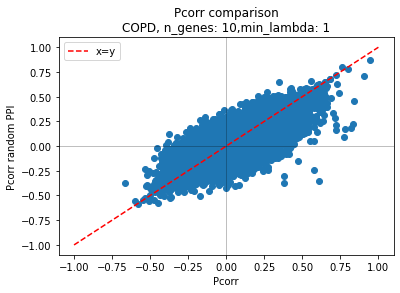

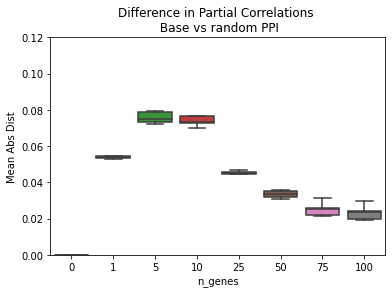

In [28]:
df_l2_rnd_ppi = compare_base_review(name_exp='rnd_PPI',y_lim=[0,.12])

Max distance: 1.0222476195865373 3674.039745403131


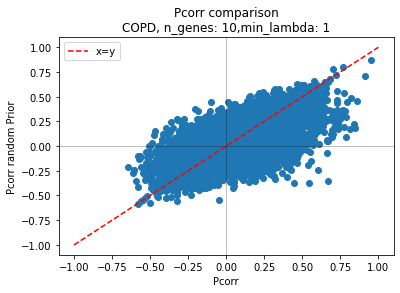

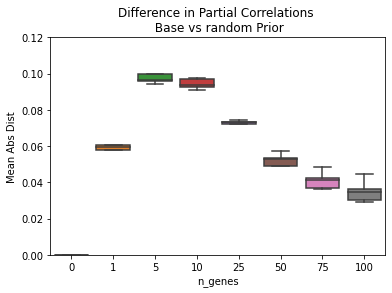

In [29]:
df_l2_rnd_prior = compare_base_review(name_exp='rnd_Prior',y_lim=[0,.12])


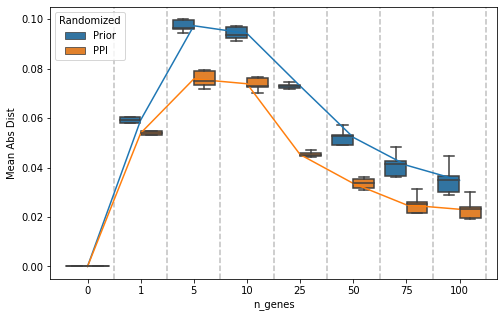

In [68]:
df_l2_rnd_prior['Randomized'] = 'Prior'
df_l2_rnd_ppi['Randomized'] = 'PPI'

plt.figure(figsize=[8,5])
df_l2_rnd = pd.concat([df_l2_rnd_prior,df_l2_rnd_ppi])
ax = sns.boxplot(data=df_l2_rnd,x='n_genes',y='Mean Abs Dist',hue='Randomized')
lines = [plt.axvline(x+.5,c='gray',linestyle='--',alpha=.5) for x in ax.get_xticks()]
plt.plot(ax.get_xticks(),df_l2_rnd.query('Randomized=="Prior"').groupby(['n_genes'])['Mean Abs Dist'].mean())
plt.plot(ax.get_xticks(),df_l2_rnd.query('Randomized=="PPI"').groupby(['n_genes'])['Mean Abs Dist'].mean())
a=1

### Chromosome 5

In [243]:
import pickle 
#import Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
from tqdm import tqdm
# setting path
sys.path.append('../src')
from Preprocessing import *
import utils_pcorr 

list_min_lambda = [0,0.1,1,10]
list_n_genes = [0,1,5,10,25,50,75,100]
list_ch = ['5']

list_pop = ['case','control']
import utils_pcorr 

dict_params = {'gex_name':'LTRC',
               'list_pop':list_pop,
               'list_ch':list_ch,
               'list_n_genes':list_n_genes,
               'list_min_lambda':list_min_lambda}
reload(utils_pcorr)

dir_pcorr_output = "/proj/regeps/regep00/studies/LTRC/analyses/remge/PartialCorrelation/Pcorr_output_review_ch5/"
df_melt_pcor_ltrc,array_pcors_ltrc,list_params_ltrc = utils_pcorr.read_data(dict_params,dir_pcorr_output)
print('Load LTRC:', df_melt_pcor_ltrc.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.72s/it]


Load LTRC: (3054860, 9)


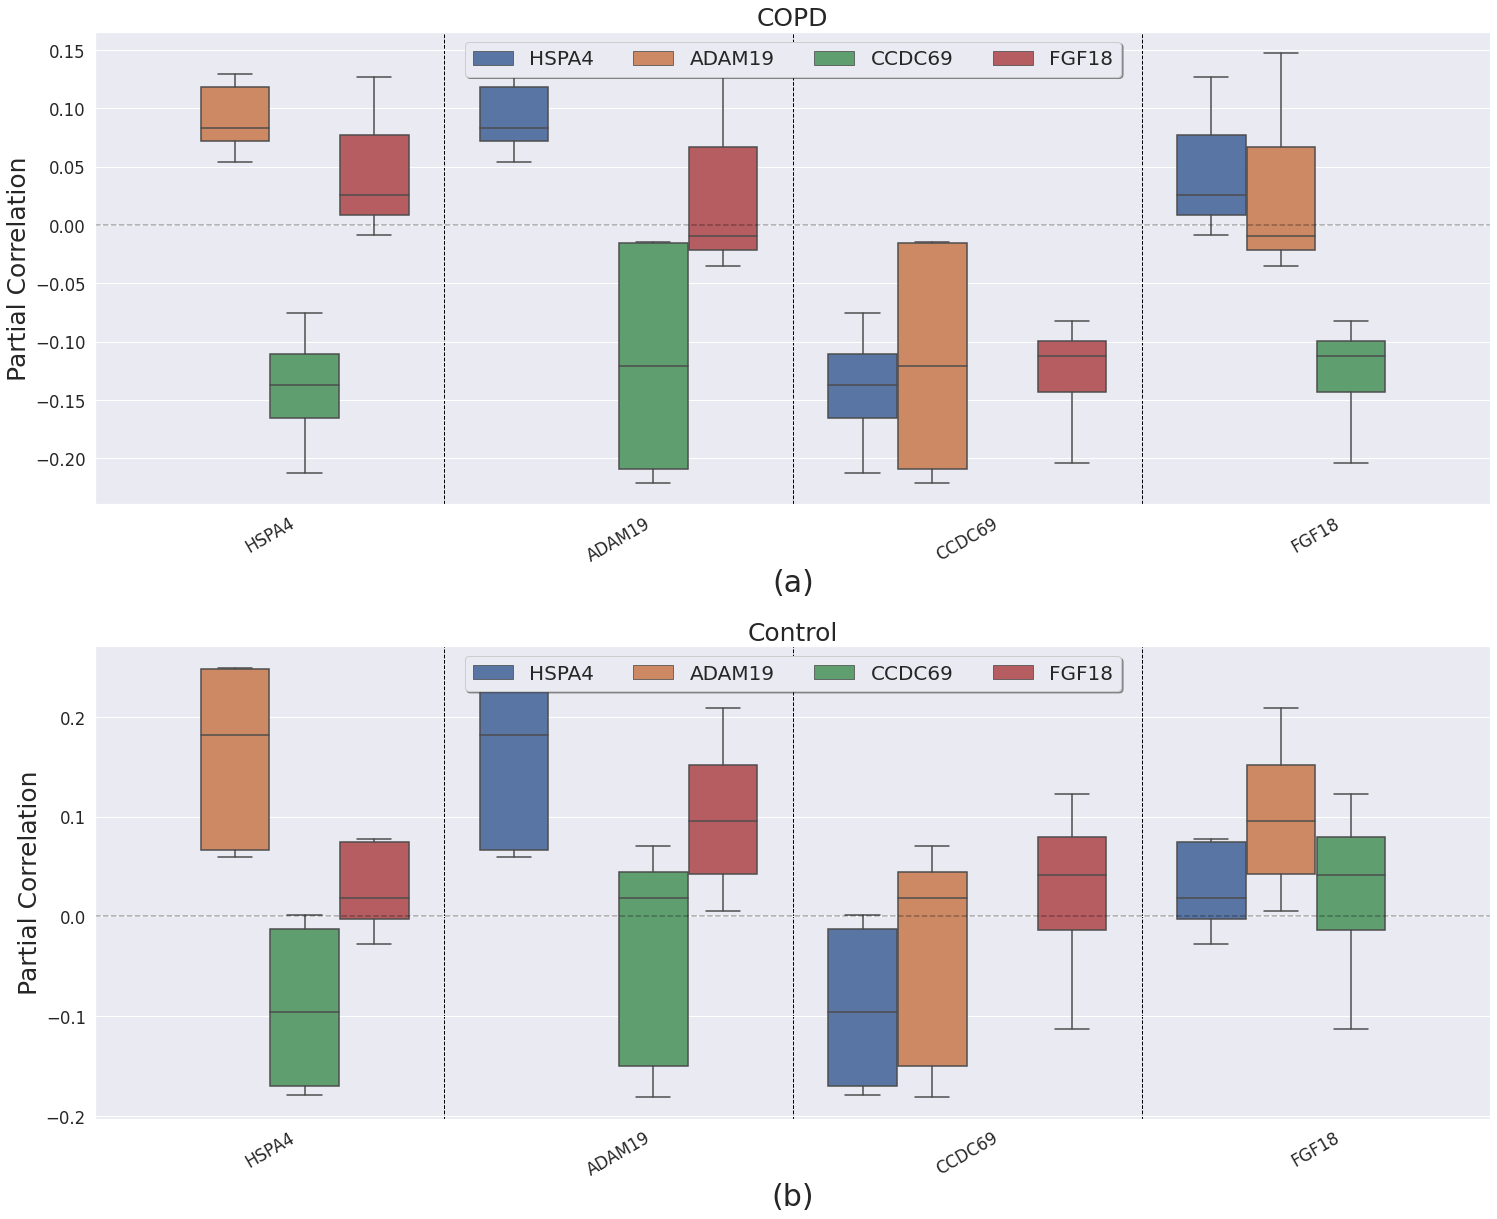

In [245]:
sns.set(font_scale=1.5)
set_target_genes = set(pd.read_csv('../data/List_gene_ch5_COPD.txt', header=None)[0])
list_pop = ['case','control']


reload(utils_pcorr)

utils_pcorr.plot_edges_distr(df_melt_pcor_ltrc,list_pop,set_target_genes,ch='5')
#plt.savefig('../figures/Figure 3.pdf')

In [242]:
df_melt_pcor_ltrc#.query('gene1 in @set_target_genes or gene2 in @set_target_genes')

,gene1,gene2,value,population,chromosomes,n_genes,min_lambda,edge,value_abs
4952,AADAT,ABCE1,-0.136709,case,5,50,10.0,AADAT-ABCE1,0.136709
4952,AADAT,ABCE1,0.025400,case,5,100,0.0,AADAT-ABCE1,0.025400
4952,AADAT,ABCE1,-0.135538,case,5,100,10.0,AADAT-ABCE1,0.135538
4952,AADAT,ABCE1,-0.329551,case,5,1,0.1,AADAT-ABCE1,0.329551
4952,AADAT,ABCE1,-0.026742,control,5,25,0.1,AADAT-ABCE1,0.026742
...,...,...,...,...,...,...,...,...,...
7269,ZNF827,ZNF330,-0.212971,case,5,25,10.0,ZNF827-ZNF330,0.212971
7269,ZNF827,ZNF330,-0.395536,control,5,1,0.1,ZNF827-ZNF330,0.395536
7269,ZNF827,ZNF330,-0.115869,control,5,75,1.0,ZNF827-ZNF330,0.115869
7269,ZNF827,ZNF330,-0.216124,case,5,25,0.1,ZNF827-ZNF330,0.216124


In [ ]:
set_target_genes = set(pd.read_csv('../data/List_gene_ch5_COPD.txt', header=None)[0])

In [240]:
set_target_genes

{'ADAM19', 'CCDC69', 'FGF18', 'HSPA4', 'HTR4'}

### Check Partial Correlation on PPI edges vs non PPI edges

In [62]:
df_ppi = pd.read_csv('../data/PPI/ppi_stable.csv')

In [70]:
list_inters_genes = set(df_ppi.values.flatten()).intersection(df_pcorr_old.index)
df_ppi_int = df_ppi.query('protein1 in @list_inters_genes and protein2 in @list_inters_genes')
list_inters_genes = list(list_inters_genes)
df_pcorr_old.loc[list_inters_genes,list_inters_genes]

,ELF2,HADH,LEF1,PLA2G12A,MRPL1,METAP1,SEC24B,SMAD1,OSTC,BMP2K,...,MTHFD2L,PPP3CA,ELOVL6,EIF4E,UNC5C,SPP1,GAR1,SCARB2,SGMS2,CXCL11
ELF2,0.000000,-0.274546,0.015589,-0.087638,0.000255,-0.030197,0.532371,0.181001,-0.158771,-0.042810,...,0.167599,0.232160,-0.047790,0.154603,0.134403,-0.193677,0.001258,0.088647,0.197533,0.136028
HADH,-0.274546,0.000000,-0.159462,0.304683,0.155621,0.266922,0.016987,-0.048115,0.133593,-0.164453,...,-0.225964,-0.065622,0.041193,-0.123673,-0.009752,0.080947,-0.152574,0.271556,-0.138529,0.083509
LEF1,0.015589,-0.159462,0.000000,-0.193922,-0.098409,0.097130,-0.128382,0.299099,0.257246,0.211532,...,-0.250443,0.047229,-0.117900,-0.180434,0.311914,0.139274,-0.062530,-0.045072,-0.301474,-0.190567
PLA2G12A,-0.087638,0.304683,-0.193922,0.000000,0.060561,0.127919,0.095771,-0.002858,0.151960,-0.254678,...,-0.161642,0.249327,0.097770,-0.156403,-0.100895,-0.135059,-0.078846,0.403564,-0.153864,0.186203
MRPL1,0.000255,0.155621,-0.098409,0.060561,0.000000,0.038854,-0.118858,0.049959,0.362227,0.006465,...,0.121136,-0.028248,0.146528,0.203120,-0.212455,0.075855,0.251833,0.147699,0.043608,0.075513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPP1,-0.193677,0.080947,0.139274,-0.135059,0.075855,-0.014694,-0.312257,0.127214,0.391869,0.448213,...,0.182716,-0.181808,-0.057196,0.182047,0.093270,0.000000,0.237715,-0.171781,-0.006618,-0.316937
GAR1,0.001258,-0.152574,-0.062530,-0.078846,0.251833,0.038271,0.063773,0.206740,0.510156,0.376578,...,0.527878,0.157315,0.155646,0.700297,-0.289755,0.237715,0.000000,0.073599,0.489280,-0.001786
SCARB2,0.088647,0.271556,-0.045072,0.403564,0.147699,0.223155,0.441754,0.160187,0.227065,0.081608,...,-0.276615,0.542373,0.053156,0.252711,0.343975,-0.171781,0.073599,0.000000,-0.008087,0.343604
SGMS2,0.197533,-0.138529,-0.301474,-0.153864,0.043608,-0.283073,0.286797,-0.206245,-0.221253,0.068322,...,0.657942,0.036052,0.090621,0.578708,-0.136562,-0.006618,0.489280,-0.008087,0.000000,-0.063640


In [211]:
def plot_ppi_coor(df_pcorr_old,df_ppi_int,corr):
    idx_gene = dict(enumerate(df_pcorr_old.index))
    gene_idx = {y:x for x,y in idx_gene.items()}
    
    pcorr_ppi = df_pcorr_old.values[df_ppi_int.protein1.map(gene_idx).values,df_ppi_int.protein2.map(gene_idx).values]

    pcorr_not_ppi = df_pcorr_old.values.copy()
    pcorr_not_ppi[df_ppi_int.protein1.map(gene_idx).values,df_ppi_int.protein2.map(gene_idx).values] =-10
    pcorr_not_ppi = pcorr_not_ppi[np.triu_indices_from(pcorr_not_ppi,1)]
    pcorr_not_ppi = pcorr_not_ppi[pcorr_not_ppi!=-10]

    plt.hist(pcorr_not_ppi,alpha=.5,density=True,label=corr+'W/o PPI edge',bins=20)
    plt.hist(pcorr_ppi,alpha=.5,density=True,label=corr+'With PPI edge',bins=20)
    plt.legend()
    plt.title('Pcorr distribution')


0 0 case


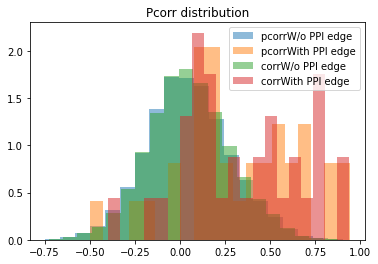

1 0 case


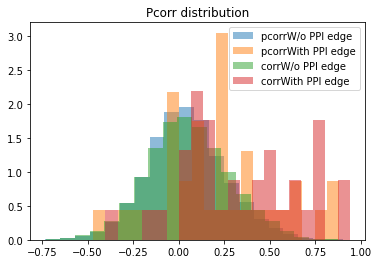

5 0 case


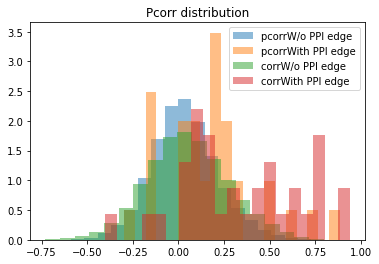

10 0 case


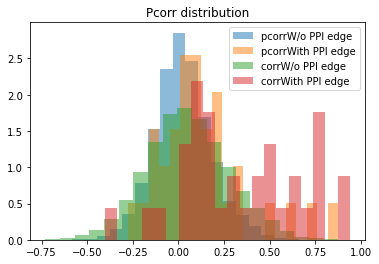

25 0 case


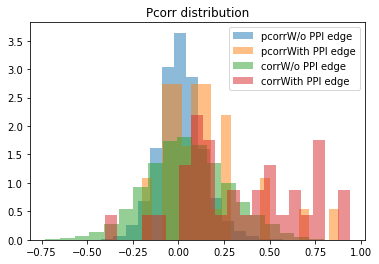

50 0 case


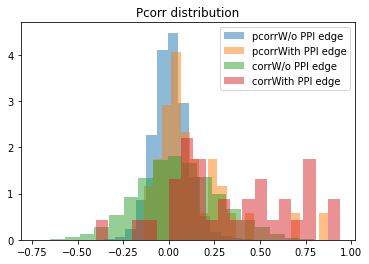

75 0 case


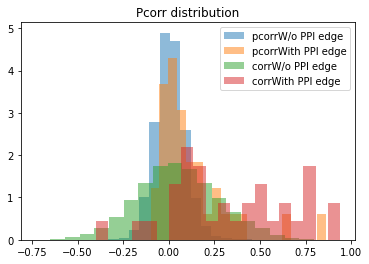

100 0 case


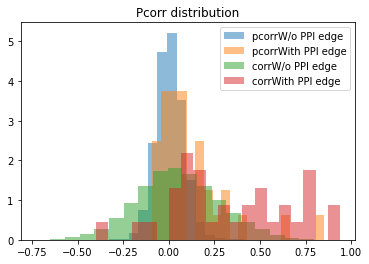

1 0.1 case


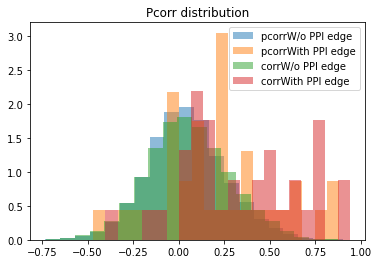

5 0.1 case


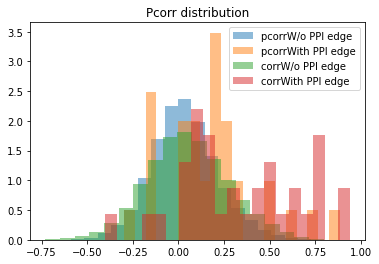

10 0.1 case


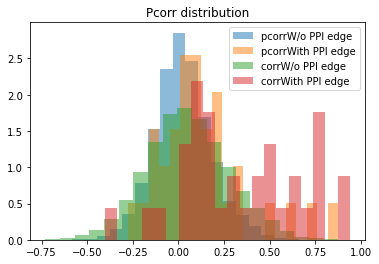

25 0.1 case


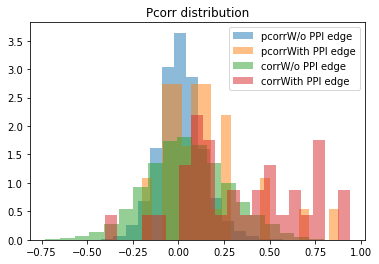

50 0.1 case


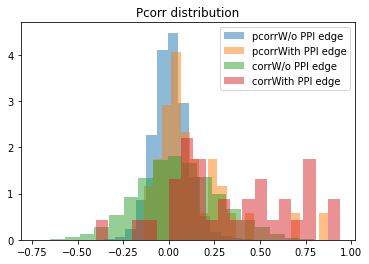

75 0.1 case


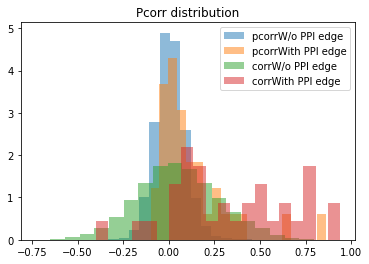

100 0.1 case


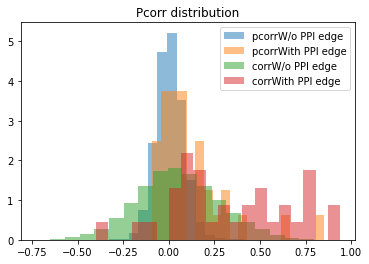

1 1 case


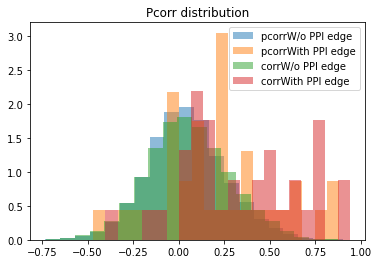

5 1 case


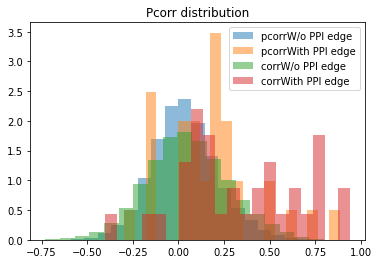

10 1 case


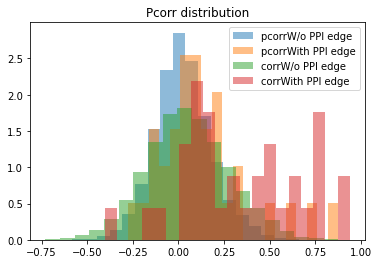

25 1 case


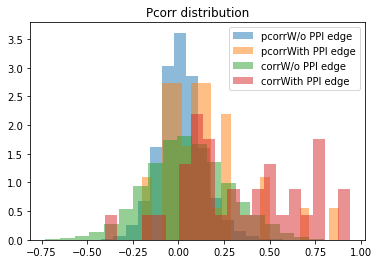

50 1 case


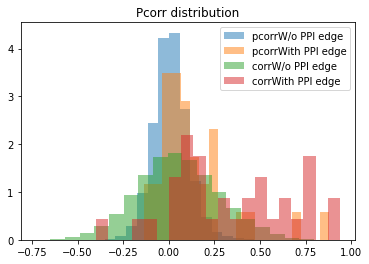

75 1 case


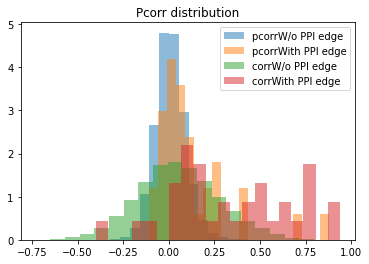

100 1 case


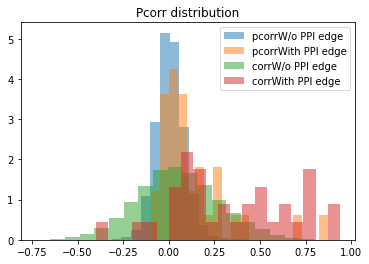

1 10 case


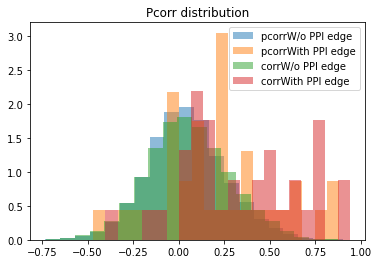

5 10 case


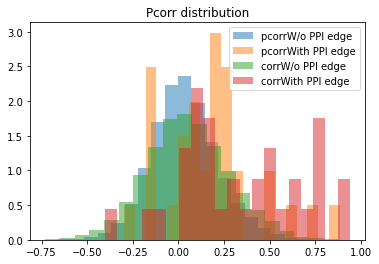

10 10 case


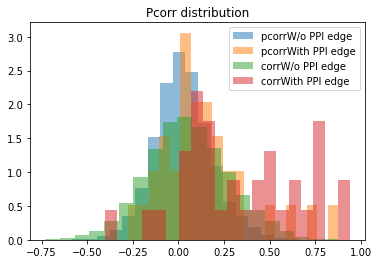

25 10 case


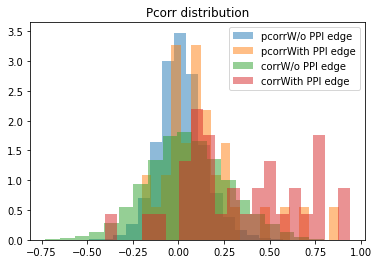

50 10 case


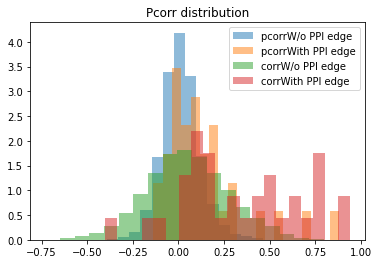

75 10 case


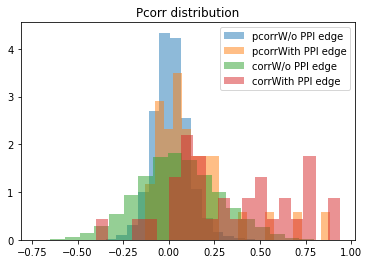

100 10 case


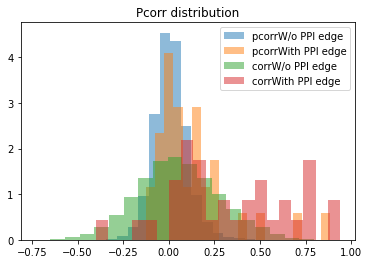

0 0 control


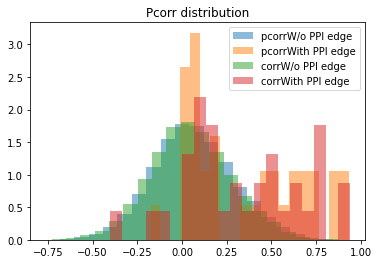

1 0 control


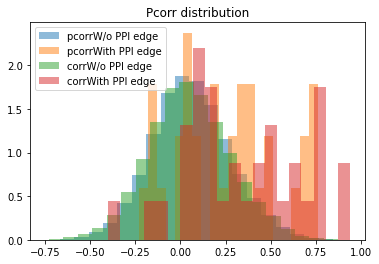

5 0 control


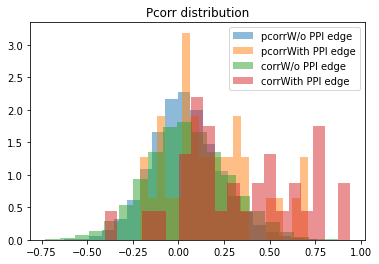

10 0 control


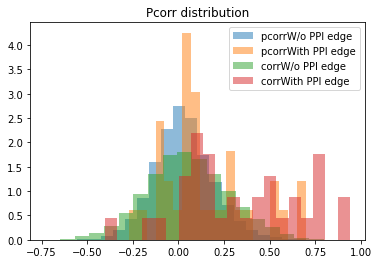

25 0 control


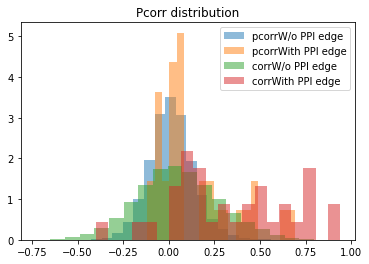

50 0 control


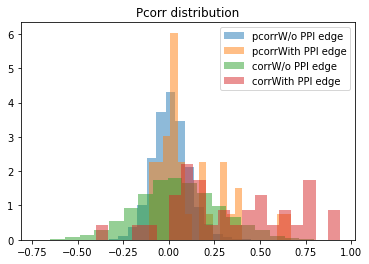

75 0 control


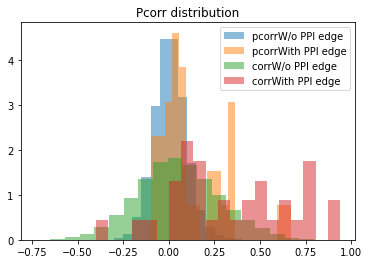

100 0 control


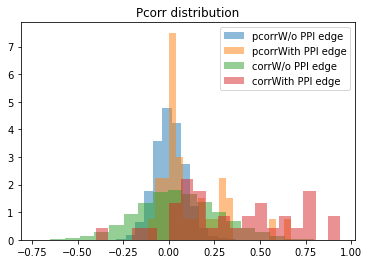

1 0.1 control


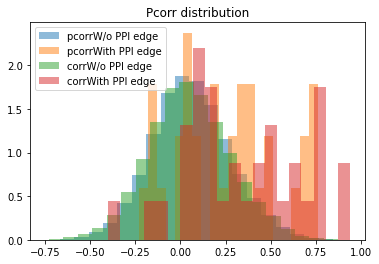

5 0.1 control


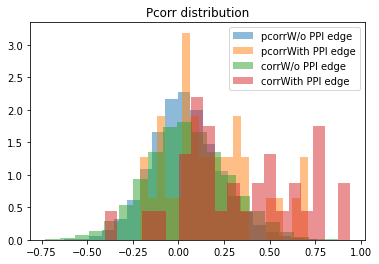

10 0.1 control


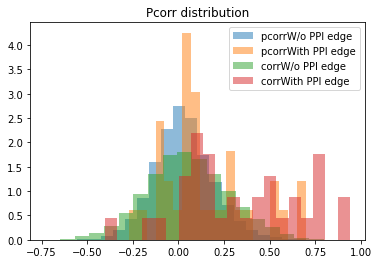

25 0.1 control


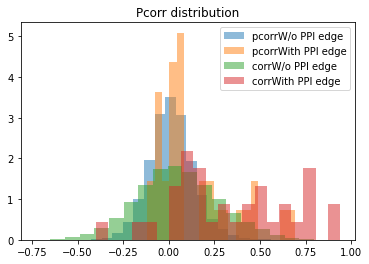

50 0.1 control


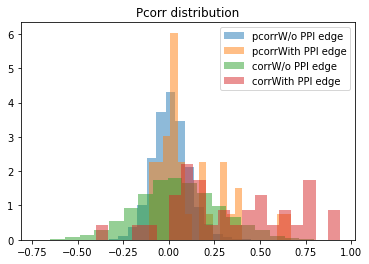

75 0.1 control


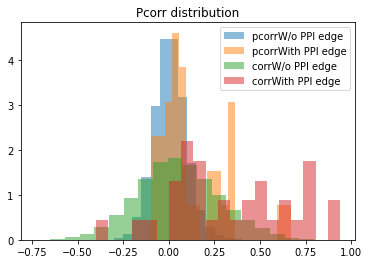

100 0.1 control


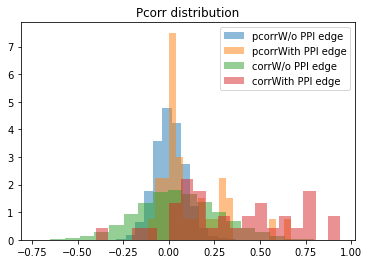

1 1 control


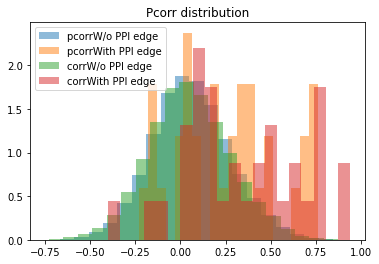

5 1 control


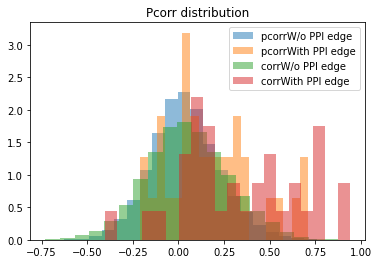

10 1 control


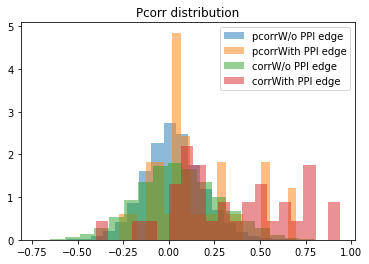

25 1 control


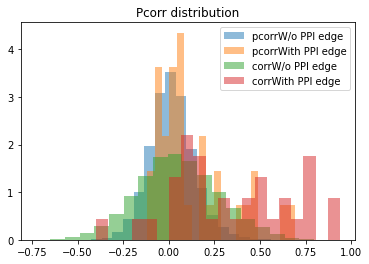

50 1 control


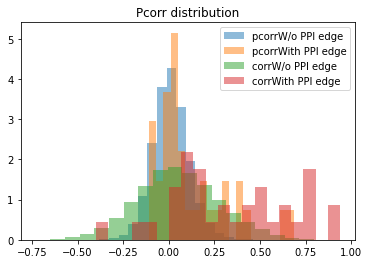

75 1 control


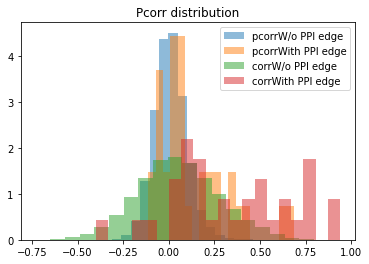

100 1 control


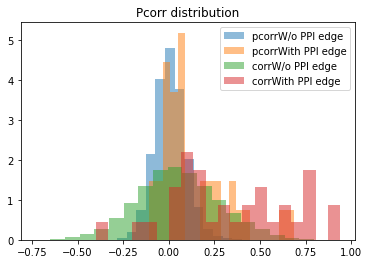

1 10 control


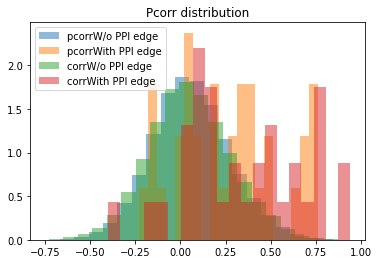

5 10 control


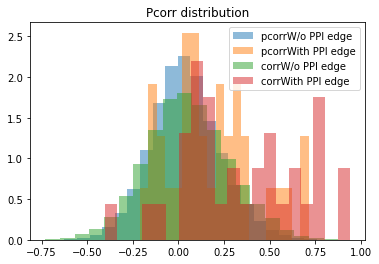

10 10 control


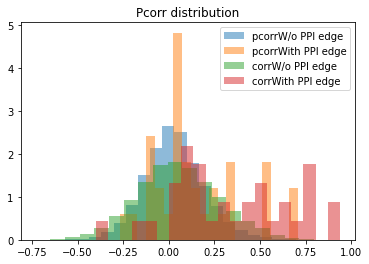

25 10 control


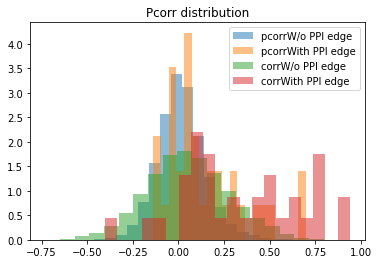

50 10 control


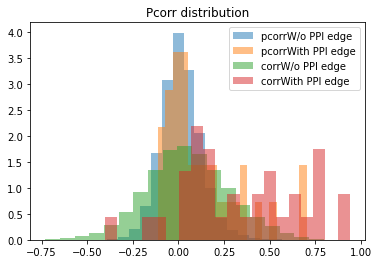

75 10 control


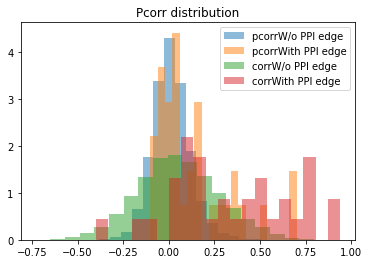

100 10 control


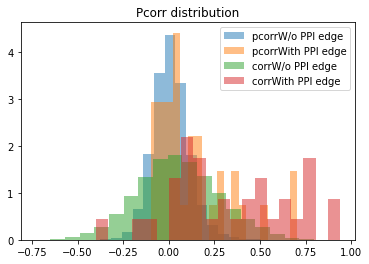

In [212]:
for pop in ['case','control']:
        for ml in list_min_lambda:
            for ng in list_n_genes:
                if ml!=0 and ng==0:
                    continue
                path_file = "/proj/regeps/regep00/studies/LTRC/analyses/remge/PartialCorrelation/Pcorr_output_same_cont_genes/LTRC/nreg_%i_minL_%i_ch_4/obs_%s.csv"%(ng,ml,pop)
                df_pcorr_old = pd.read_csv(path_file,index_col=0)
                print(ng,ml,pop)
                plot_ppi_coor(df_pcorr_old,df_ppi_int,'pcorr')
                plot_ppi_coor(df_exp.loc[df_pcorr_old.index].T.corr(),df_ppi_int,'corr')
                plt.show()